Create and mount google drive directory path

In [1]:
from google.colab import drive
drive.mount("/content/drive/")
dir_path = "/content/drive/My Drive/Colab Notebooks/fruits-360-original-size"

Mounted at /content/drive/


Check and print all files in directory

In [2]:
import os
for dirname, _, filenames in os.walk(dir_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Streaming output truncated to the last 5000 lines.
/content/drive/My Drive/Colab Notebooks/fruits-360-original-size/Training/apple_red_delicios_1/r1_136.jpg
/content/drive/My Drive/Colab Notebooks/fruits-360-original-size/Training/apple_red_delicios_1/r1_256.jpg
/content/drive/My Drive/Colab Notebooks/fruits-360-original-size/Training/apple_red_delicios_1/r1_46.jpg
/content/drive/My Drive/Colab Notebooks/fruits-360-original-size/Training/apple_red_delicios_1/r1_102.jpg
/content/drive/My Drive/Colab Notebooks/fruits-360-original-size/Training/apple_red_delicios_1/r1_152.jpg
/content/drive/My Drive/Colab Notebooks/fruits-360-original-size/Training/apple_red_delicios_1/r1_146.jpg
/content/drive/My Drive/Colab Notebooks/fruits-360-original-size/Training/apple_red_delicios_1/r1_120.jpg
/content/drive/My Drive/Colab Notebooks/fruits-360-original-size/Training/apple_red_delicios_1/r1_248.jpg
/content/drive/My Drive/Colab Notebooks/fruits-360-original-size/Training/apple_red_delicios_1/r1_242.

Import required library definitions

In [3]:
import numpy as np
import pandas as pd
import os
from glob import glob
import matplotlib.pyplot as plt
import tensorflow as tf

# Specific imports
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix

Create image and label arrays; verify labels


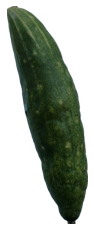

In [4]:
train_path  =  "drive/My Drive/Colab Notebooks/fruits-360-original-size/Training/"
test_path = "drive/My Drive/Colab Notebooks/fruits-360-original-size/Test/"

# Get train and test files
image_files = glob(train_path + '/*/*.jp*g')
test_image_files = glob(test_path + '/*/*.jp*g')


# Get number of classes
folders = glob(train_path + '/*')

# Display any random image
plt.imshow(plt.imread(np.random.choice(image_files)))
plt.axis('off')
plt.show()

In [5]:
IMAGE_SIZE = [100, 100]
batch_size = 32
epochs = 3

vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights="imagenet", include_top=False)
# Don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

x = Flatten()(vgg.output)
prediction = Dense((len(folders)), activation='softmax')(x)

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
#cnn_model = VGG16()
#cnn_model.summary()

#cnn_model = Sequential()
#cnn_model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
#cnn_model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
#cnn_model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
#cnn_model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
#cnn_model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
#cnn_model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
#cnn_model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
#cnn_model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
#cnn_model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
#cnn_model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
#cnn_model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#cnn_model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#cnn_model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#cnn_model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
#cnn_model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#cnn_model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#cnn_model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#cnn_model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
#cnn_model.add(Flatten())
#cnn_model.add(Dense(units=4096,activation="relu"))
#cnn_model.add(Dense(units=4096,activation="relu"))
#cnn_model.add(Dense(units=67, activation="softmax"))



#from keras.models import Sequential
#from keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,Flatten,MaxPool2D
#from keras.optimizers import RMSprop,Adam
#from keras.layers import Activation, Convolution2D, Dropout, Conv2D,AveragePooling2D, BatchNormalization,Flatten,GlobalAveragePooling2D
#from keras import layers
#from keras.regularizers import l2
#from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau

#l2_reg = 0.001

#cnn_model.add(Conv2D(filters = 32, kernel_size = (2,2), input_shape = (50,50, 3), activation = 'relu',kernel_regularizer = l2(l2_reg)))
#cnn_model.add(MaxPool2D(pool_size = (2,2)))
#cnn_model.add(Conv2D(filters = 64, kernel_size = (2,2), activation = 'relu',kernel_regularizer = l2(l2_reg)))
#cnn_model.add(MaxPool2D(pool_size = (2,2)))
#cnn_model.add(Conv2D(filters = 128, kernel_size = (2,2), activation = 'relu',kernel_regularizer = l2(l2_reg)))
#cnn_model.add(MaxPool2D(pool_size = (2,2)))
#cnn_model.add(Dropout(0.1))

#cnn_model.add(Flatten())

#cnn_model.add(Dense(64, activation = 'relu'))
#cnn_model.add(Dense(16, activation = 'relu'))
#cnn_model.add(Dense(7, activation = 'softmax'))

In [6]:
#from tensorflow.keras.optimizers import Adam
#opt = Adam(lr = 0.001)
#cnn_model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])

# Create Model
cnn_model = Model(inputs=vgg.input, outputs=prediction)

# View structure of the model
cnn_model.summary()

# Configure model
cnn_model.compile(
  loss='categorical_crossentropy',
  optimizer='rmsprop',
  metrics=['accuracy']
)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 100, 100, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 100, 100, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 50, 50, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 50, 50, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 50, 50, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 25, 25, 128)       0     

In [7]:
# Create an instance of ImageDataGenerator
# performs automatic image augmentation
gen = ImageDataGenerator(
  rotation_range=20,
  width_shift_range=0.1,
  height_shift_range=0.1,
  shear_range=0.1,
  zoom_range=0.2,
  horizontal_flip=True,
  vertical_flip=True,
  rescale=1./255,  
  preprocessing_function=preprocess_input
)

# Get label mapping of class and label number
test_gen = gen.flow_from_directory(test_path, target_size=IMAGE_SIZE)
print(test_gen.class_indices)
labels = [None] * len(test_gen.class_indices)
for k, v in test_gen.class_indices.items():
  labels[v] = k

Found 3110 images belonging to 24 classes.
{'apple_6': 0, 'apple_braeburn_1': 1, 'apple_crimson_snow_1': 2, 'apple_golden_1': 3, 'apple_golden_2': 4, 'apple_golden_3': 5, 'apple_granny_smith_1': 6, 'apple_hit_1': 7, 'apple_pink_lady_1': 8, 'apple_red_1': 9, 'apple_red_2': 10, 'apple_red_3': 11, 'apple_red_delicios_1': 12, 'apple_red_yellow_1': 13, 'apple_rotten_1': 14, 'cabbage_white_1': 15, 'carrot_1': 16, 'cucumber_1': 17, 'cucumber_3': 18, 'eggplant_violet_1': 19, 'pear_1': 20, 'pear_3': 21, 'zucchini_1': 22, 'zucchini_dark_1': 23}


In [8]:
# Create generators for training and validation
train_generator = gen.flow_from_directory(
  train_path,
  target_size=IMAGE_SIZE,
  shuffle=True,
  batch_size=batch_size,
)
valid_generator = gen.flow_from_directory(
  test_path,
  target_size=IMAGE_SIZE,
  shuffle=False,
  batch_size=batch_size,
)
# Fit the model
sol = cnn_model.fit(
  train_generator,
  validation_data=valid_generator,
  epochs=epochs,
)


Found 6251 images belonging to 24 classes.
Found 3110 images belonging to 24 classes.
Epoch 1/3
196/196 [==============================] - 2289s 12s/step - loss: 1.3211 - accuracy: 0.6185 - val_loss: 0.7391 - val_accuracy: 0.7833
Epoch 2/3
196/196 [==============================] - 871s 4s/step - loss: 0.5509 - accuracy: 0.8411 - val_loss: 0.4358 - val_accuracy: 0.8621
Epoch 3/3
196/196 [==============================] - 872s 4s/step - loss: 0.3778 - accuracy: 0.8887 - val_loss: 0.3045 - val_accuracy: 0.9158


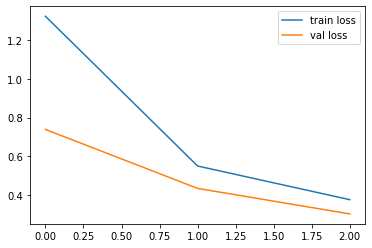

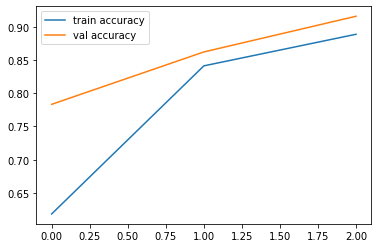

In [10]:
# Plot the train and validation loss
plt.plot(sol.history['loss'], label='train loss')
plt.plot(sol.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# Plot the train and validation accuracies
plt.plot(sol.history['accuracy'], label='train accuracy')
plt.plot(sol.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()

In [12]:
print("Final training accuracy = {}".format(sol.history["accuracy"][-1]))
print("Final validation accuracy = {}".format(sol.history["val_accuracy"][-1]))

Final training accuracy = 0.888657808303833
Final validation accuracy = 0.9157556295394897


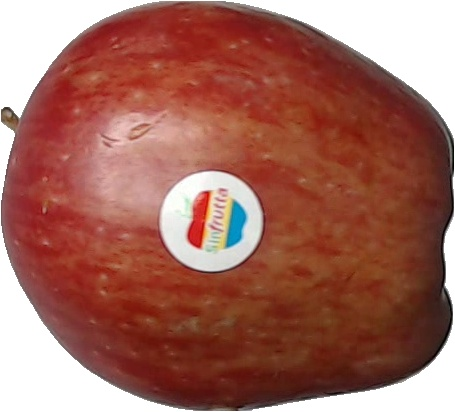

Actual class: apple_red_1
Predicted class: apple_red_1


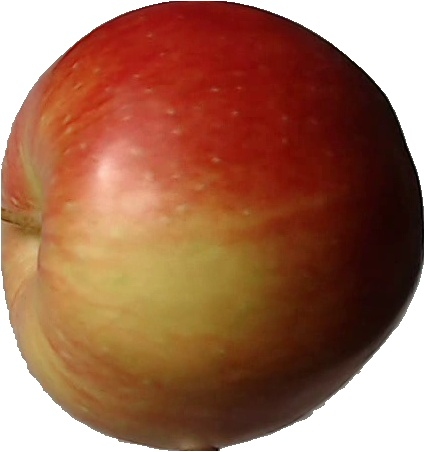

Actual class: apple_red_2
Predicted class: apple_red_2


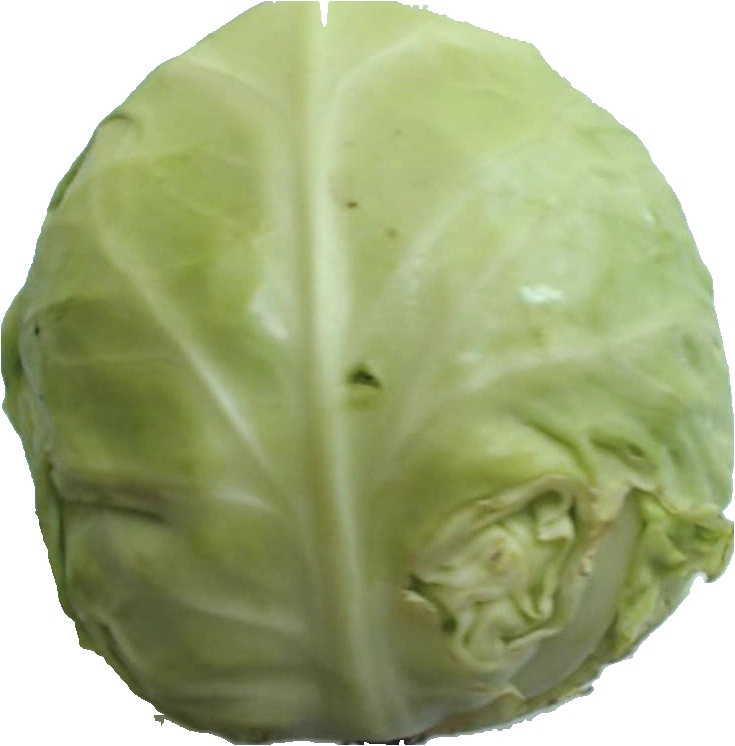

Actual class: cabbage_white_1
Predicted class: cabbage_white_1


In [16]:
# Visualizing predictions
result = np.round(cnn_model.predict(valid_generator))
import random
test_files = []
actual_res = []
test_res = []
for i in range(0, 3):
  rng = random.randint(0, len(valid_generator.filenames))
  test_files.append(test_path +  valid_generator.filenames[rng])
  actual_res.append(valid_generator.filenames[rng].split('/')[0])
  test_res.append(labels[np.argmax(result[rng])])
  
from IPython.display import Image, display
for i in range(0, 3):
  display(Image(test_files[i]))
  print("Actual class: " + str(actual_res[i]))
  print("Predicted class: " + str(test_res[i]))